## Change-one examination

In [69]:
%matplotlib inline
# %matplotlib notebook
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/experiments/mixup_alpha.csv', index_col=0)
df.head()

,loss,accuracy,avs_dist,avs_l1,avs_l2,history,elapsed
mixup_alpha,,,,,,,
0.0,2.770559,0.352797,0.537401,0.224025,0.132680,"{'loss': [4.711802959442139, 2.850266456604004...",141.299682
0.1,2.708661,0.358869,0.533935,0.222964,0.132669,"{'loss': [4.788323402404785, 3.071712493896484...",163.609415
0.2,2.766745,0.360569,0.531235,0.222056,0.131893,"{'loss': [4.8600263595581055, 3.19822072982788...",247.035400
0.3,2.703579,0.365189,0.527671,0.220602,0.131132,"{'loss': [4.943488597869873, 3.290167093276977...",230.373526
0.4,2.669084,0.359191,0.533593,0.222170,0.131888,"{'loss': [4.953614234924316, 3.364022254943847...",165.210245


In [85]:
def get_stats(df):
    ser = pd.Series()
    for col in df.select_dtypes(include=np.number).columns:
        ser[f'{col}_mean'] = df[col].mean()
        ser[f'{col}_std'] = df[col].std()
    return ser
    
res = df.groupby(df.index).apply(get_stats)
res.head(3)

,loss_mean,loss_std,accuracy_mean,accuracy_std,avs_dist_mean,avs_dist_std,avs_l1_mean,avs_l1_std,avs_l2_mean,avs_l2_std,elapsed_mean,elapsed_std
mixup_alpha,,,,,,,,,,,,
0.0,2.724964,0.043642,0.353391,0.000603,0.537356,0.000853,0.224347,0.000398,0.133177,0.000502,125.677687,15.680118
0.1,2.701010,0.009757,0.358555,0.000422,0.533469,0.000662,0.222528,0.000378,0.132147,0.000453,164.557094,0.826006
0.2,2.735249,0.050946,0.360389,0.001424,0.532195,0.001446,0.222395,0.000457,0.132261,0.000357,214.535187,43.616029


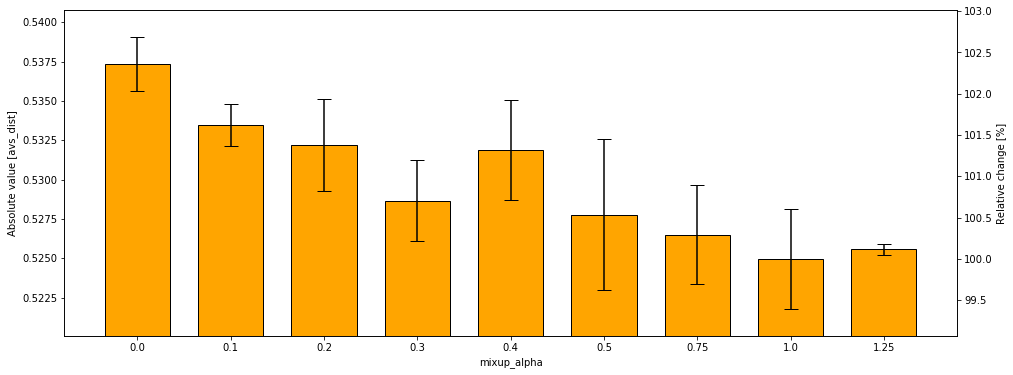

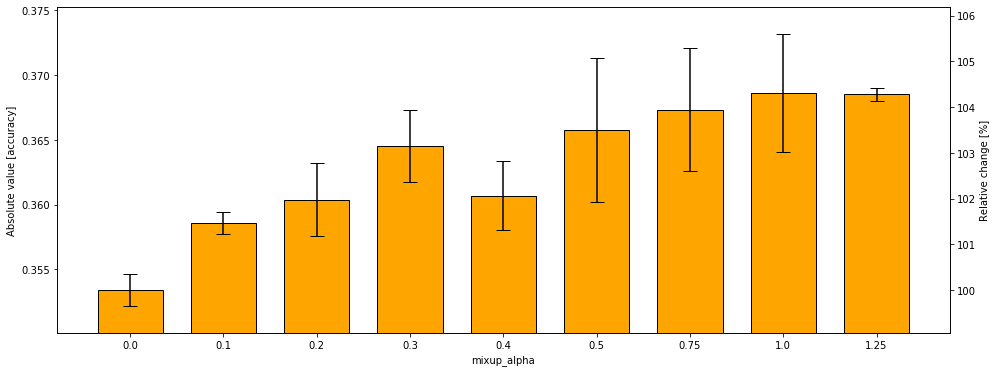

In [100]:
import matplotlib.pyplot as plt

    
def plot_col(df, col, ylabel=''):
    barWidth = 0.7
    mean = df[f'{col}_mean']
    norm_mean = mean / mean.min()
    yer = df[f'{col}_std'] * 2
    yer = yer.fillna(0)

    # The x position of bars
    x_pos = np.arange(len(mean))
    bot, top = (mean - yer).min(), (mean + yer).max()
    padding = (top - bot) * 0.1
    bot, top = bot - padding, top + padding
    
    
    fig = plt.figure(None, figsize=(16, 6,))
    
    ax = fig.add_subplot(1, 1, 1)
    
    # Create bars
    ax.bar(x_pos, mean, width = barWidth, color = 'orange', edgecolor = 'black', yerr=yer, capsize=7, label=f'{col}')

    # General layout
    ax.set_xticks([x for x in range(len(mean))]) # , df.index
    ax.set_xticklabels(['],\n'.join(str(x).split('],')) for x in df.index])
    ax.set_xlabel(df.index.name)
    ax.set_ylabel(ylabel)
    ax.set_ylim(bot, top)
    ax.set_ylabel(f'Absolute value [{col}]')
    
    ax2 = ax.twinx()

    ax2.set_ylabel('Relative change [%]')

    ax2.set_ylim(bot / mean.min() * 100, top / mean.min() * 100)
    
#     fig.legend()
    fig.show()

def plot_cols(df, cols):
    groupped_df = df.groupby(df.index).apply(get_stats)
    for col in cols:
        plot_col(groupped_df, col)
        
plot_cols(df, ['avs_dist', 'accuracy', ])

../../data/experiments/mistakes
../../data/experiments/label_smoothing:mixup_alpha.csv
2.0 runs per hyperparam option
../../data/experiments/x_groups.csv
1.8 runs per hyperparam option
../../data/experiments/label_smoothing.csv
2.9 runs per hyperparam option
../../data/experiments/mixup_alpha.csv
3.0 runs per hyperparam option


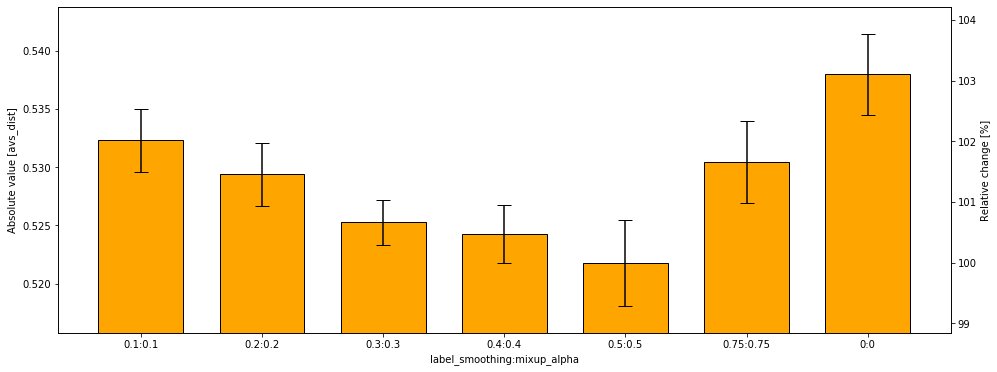

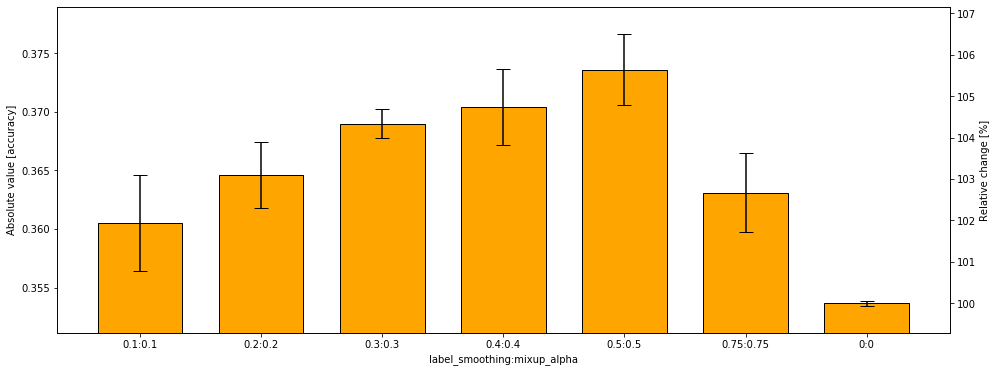

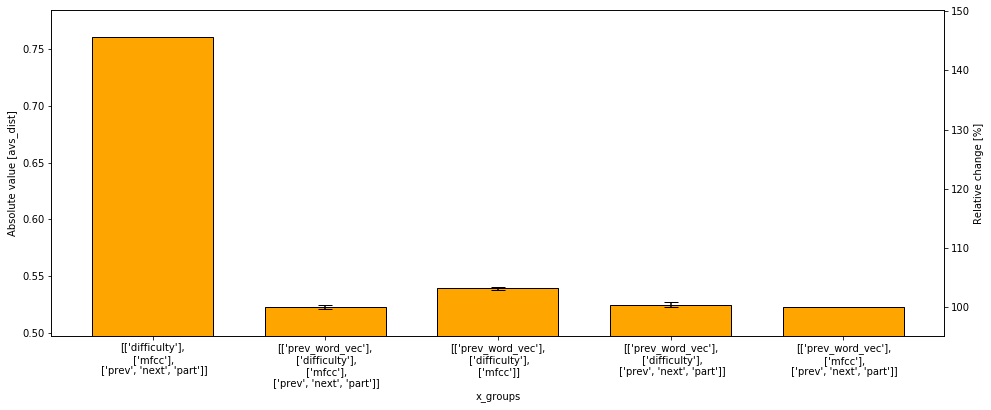

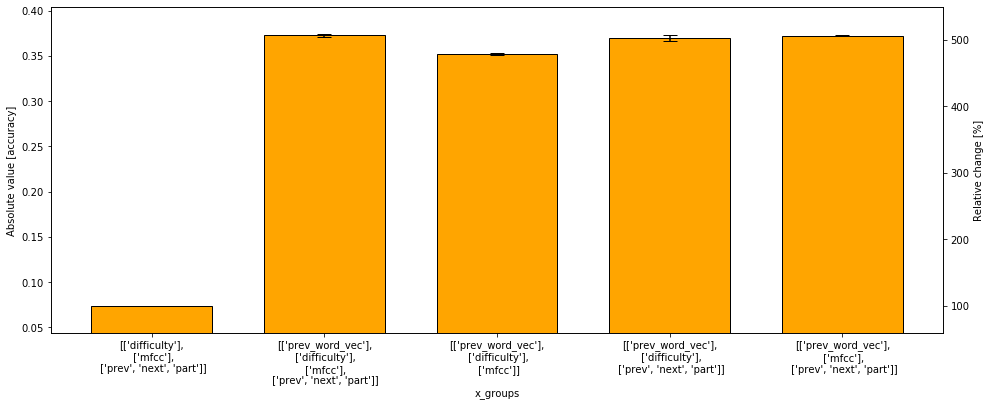

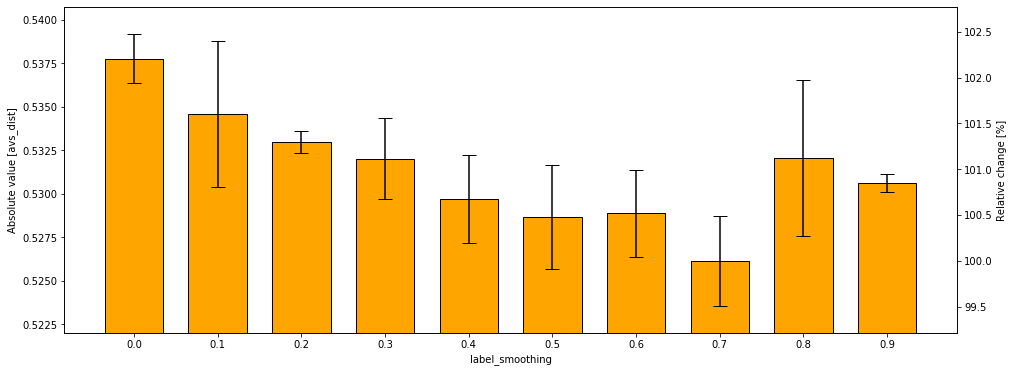

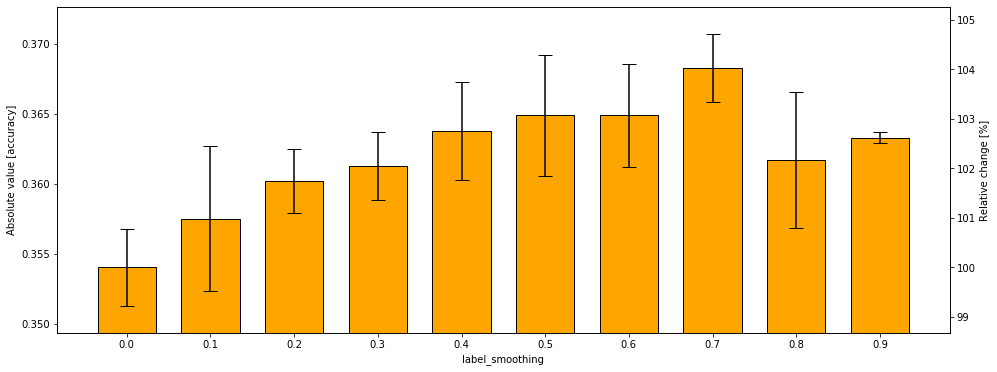

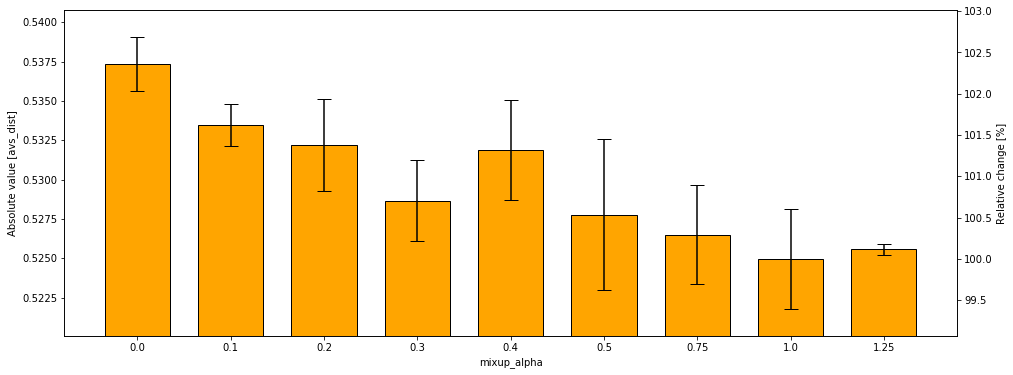

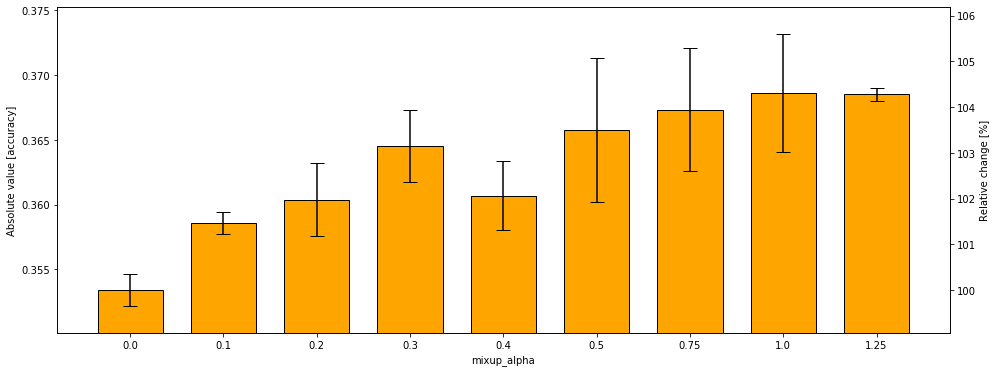

In [101]:
from pathlib import Path
experiments_path = Path('../../data/experiments')
for path in experiments_path.iterdir():
    print(path)
    if path.is_file():
        df = pd.read_csv(path, index_col=0)
        print(f'{len(df) / len(df.index.unique())} runs per hyperparam option')
        plot_cols(df, ['avs_dist', 'accuracy', ])